Epoch 1/200


c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 18850804.0000 - mae: 4261.6538 - val_loss: 18190476.0000 - val_mae: 4198.1650
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18820788.0000 - mae: 4259.8154 - val_loss: 18120626.0000 - val_mae: 4189.9248
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18368180.0000 - mae: 4209.9248 - val_loss: 18050626.0000 - val_mae: 4181.6523
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18054858.0000 - mae: 4176.4922 - val_loss: 17979616.0000 - val_mae: 4173.2441
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18307674.0000 - mae: 4201.1797 - val_loss: 17907076.0000 - val_mae: 4164.6372
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18670546.0000 - mae: 4242.5430 - val_loss: 17832766.0000 - val_mae: 4155.8027
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17802778.0000 - mae: 4142.2495 - val_loss: 17753058.0000 - val_mae: 4146.3149
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17

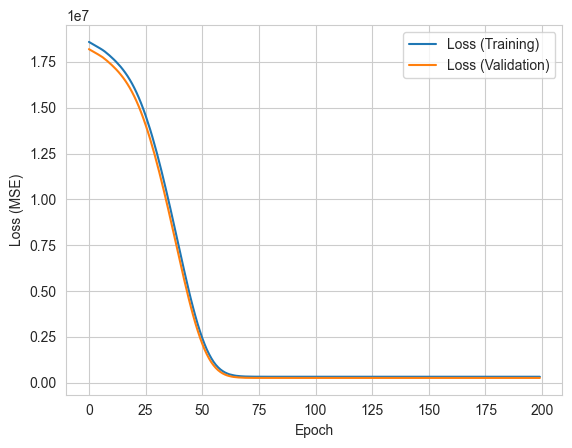

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


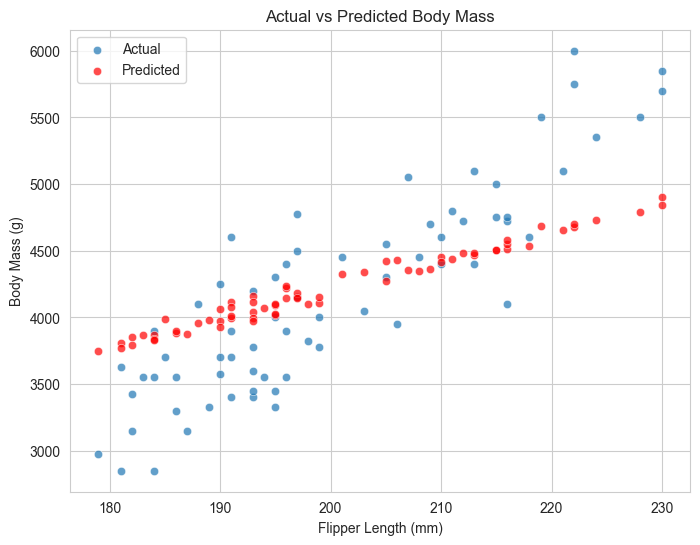

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# تنظیم استایل برای زیبایی نمودار
sns.set_style("whitegrid")

# بارگذاری داده‌ها
penguins = pd.read_csv("C:/Users/A.S.T.co/Downloads/penguins.csv")

# انتخاب ستون‌های مورد نظر و حذف مقادیر گمشده
columns = ["Flipper Length (mm)", "Body Mass (g)", "Species", "Culmen Length (mm)", "Culmen Depth (mm)"]
penguins_non_missing = penguins[columns].dropna()

# تعریف X و y برای مدل
X = penguins_non_missing[["Flipper Length (mm)", "Culmen Length (mm)"]].values
y = penguins_non_missing["Body Mass (g)"].values

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل شبکه عصبی
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(1)  # خروجی یک نود برای مقدار جرم بدن
])

# کامپایل مدل
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# آموزش مدل
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=1)

# رسم نمودار تاریخچه آموزش
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# پیش‌بینی بر روی داده‌های تست
y_pred = model.predict(X_test)

# رسم نمودار نتایج
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=y_test, label="Actual", alpha=0.7)
sns.scatterplot(x=X_test[:, 0], y=y_pred.flatten(), label="Predicted", alpha=0.7, color='red')
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Actual vs Predicted Body Mass")
plt.legend()
plt.show()